In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

In [3]:
(train_images, train_labels),(test_images, test_labels) 
    = mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
test_labels.shape

(10000,)

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### 시각화 

In [9]:
import matplotlib.pyplot as plt 

In [11]:
d = train_images[4]

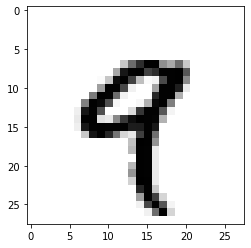

In [14]:
plt.imshow(d, cmap=plt.cm.binary)
plt.show()

In [13]:
train_labels[4]

9

In [16]:
d.max()

255

In [17]:
d.min()

0

### 신경망 작성

In [18]:
from keras import models
from keras import layers

In [21]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu'
                         , input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [24]:
network.compile(optimizer='rmsprop', 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

### X값 변형 

In [26]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

In [27]:
train_images.shape

(60000, 784)

In [28]:
test_images.shape

(10000, 784)

In [29]:
train_images.min()

0.0

In [30]:
train_images.max()

1.0

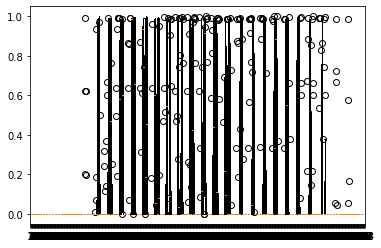

In [33]:
plt.boxplot(train_images[0:5])
plt.show()

### Y값 변환 

In [35]:
from keras.utils import to_categorical   #one-hot 

In [36]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [37]:
train_labels.shape

(60000, 10)

In [39]:
test_labels.shape

(10000, 10)

### 학습

In [40]:
network.fit(train_images, train_labels
            , epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.2561 - accuracy: 0.9266
Epoch 2/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.1043 - accuracy: 0.9691
Epoch 3/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.0691 - accuracy: 0.9790
Epoch 4/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.0506 - accuracy: 0.9845
Epoch 5/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.0381 - accuracy: 0.9888
